In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [7]:
DATA_FOLDER='./data/'
PATHS_AND_GRAPH = DATA_FOLDER + 'wikispeedia_paths-and-graph/'
PATHS_FINISHED = PATHS_AND_GRAPH + 'paths_finished.tsv'
PATHS_UNFINISHED = PATHS_AND_GRAPH + 'paths_unfinished.tsv'

In [8]:
#data exploration
paths_finished = pd.read_csv(PATHS_FINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'], encoding='utf-8', skiprows=16).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit='s')
paths_finished.head()


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,2011-02-15 03:26:49,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,2012-08-12 06:36:52,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,2012-10-03 21:10:40,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,2013-04-23 15:27:08,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [9]:
import os
os.listdir('./data')

['wikispeedia_paths-and-graph']

In [10]:
paths_unfinished= pd.read_csv(PATHS_UNFINISHED, sep='\t', header=None, names=['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'], encoding='utf-8', skiprows=17).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit='s')
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,2011-02-07 05:02:15,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,2011-02-07 05:14:11,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,2011-02-07 15:00:19,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,2011-02-07 16:06:01,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,2011-02-07 17:18:25,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


## Time per edge

In [133]:
from collections import defaultdict

,durationInSec,path,path_length
0,166,14th_century;15th_century;16th_century;Pacific...,9
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,5
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,8
3,37,14th_century;Renaissance;Ancient_Greece;Greece,4
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,7
...,...,...,...
51313,66,Yagan;Ancient_Egypt;Civilization,3
51314,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,9
51315,228,Yagan;Australia;England;France;United_States;T...,7
51316,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,4


/home/laurent/micromamba/envs/ada/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 333'. Pick better value with 'binwidth'.


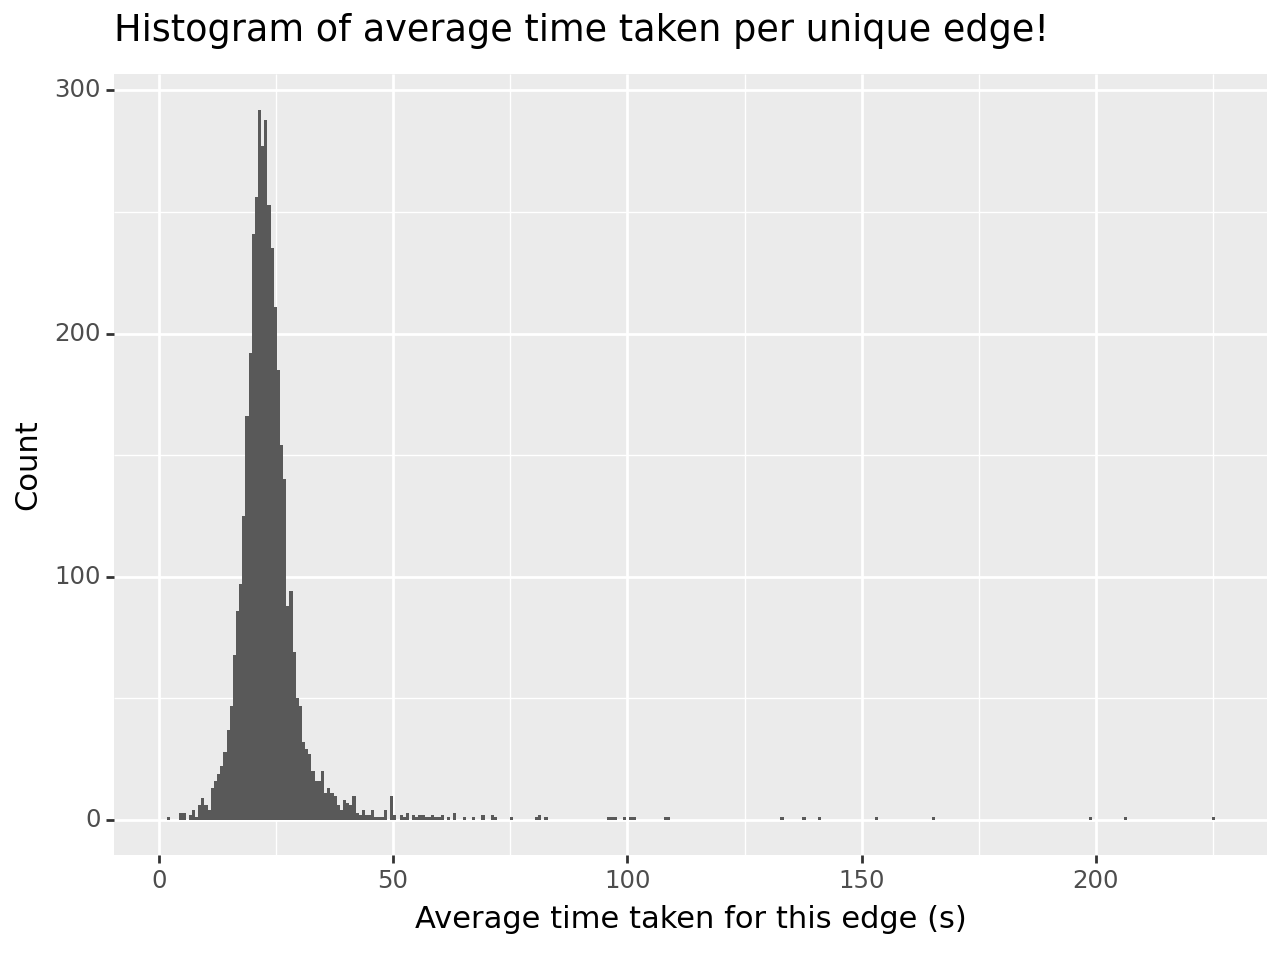

<Figure Size: (640 x 480)>

In [150]:
paths_and_time_fin = paths_finished[['durationInSec', 'path']].copy()
paths_and_time_fin['path_length'] = paths_and_time_fin['path'].apply(lambda x: len(x.split(';')))

display(paths_and_time_fin)

times_per_edge = defaultdict(list)

for idx, row in paths_and_time_fin.iterrows():
	elems_path = row['path'].split(';')
	for elem in elems_path:
		times_per_edge[elem].append(row['durationInSec'] / row['path_length'])

times_per_edge_micro = {key:np.mean(value) for key, value in times_per_edge.items()}

ggplot() + geom_histogram(aes(x = list(times_per_edge_micro.values()))) \
	+ labs(x='Average time taken for this edge (s)', y='Count', title='Histogram of average time taken per unique edge!')

Definitely promising!